In [1]:
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

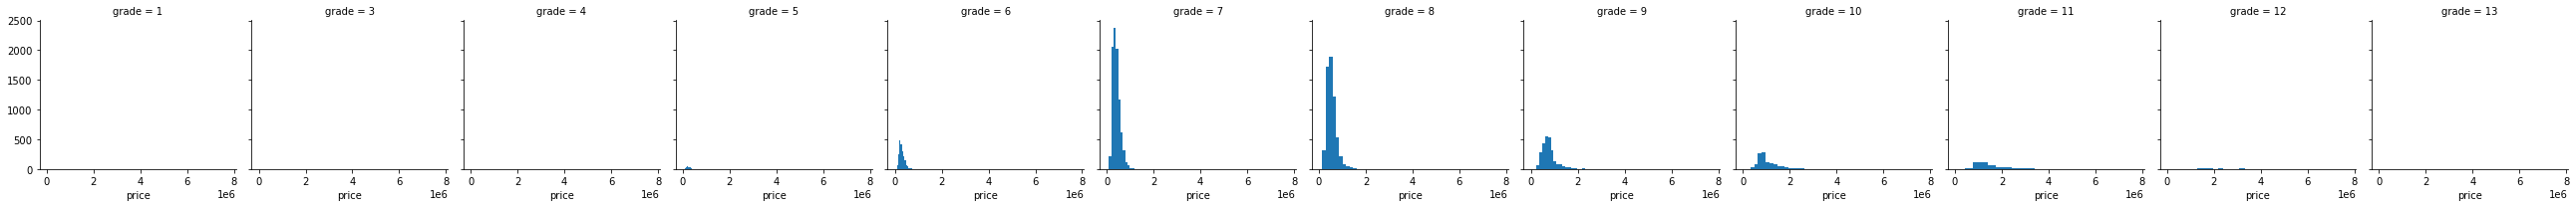

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, col="grade")
g.map(plt.hist, 'price', bins = 20)
g

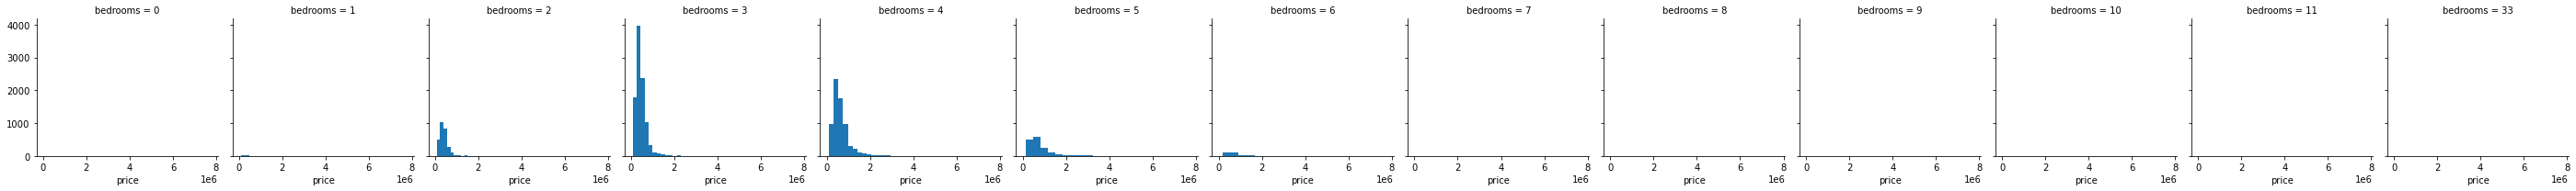

In [4]:
g = sns.FacetGrid(data, col = "bedrooms")
g.map(plt.hist, "price", bins = 20)
g

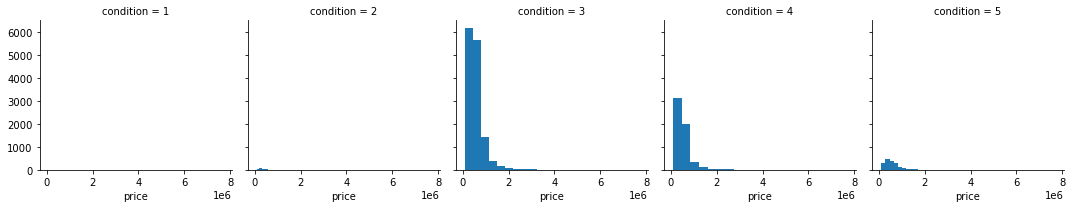

In [5]:
g = sns.FacetGrid(data, col = "condition")
g.map(plt.hist, "price", bins = 20)

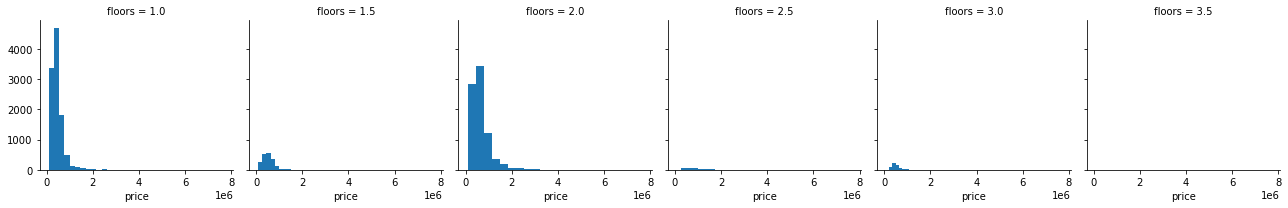

In [6]:
g = sns.FacetGrid(data, col = "floors")
g.map(plt.hist, "price", bins = 20)

In [7]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 22 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : 1.2 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

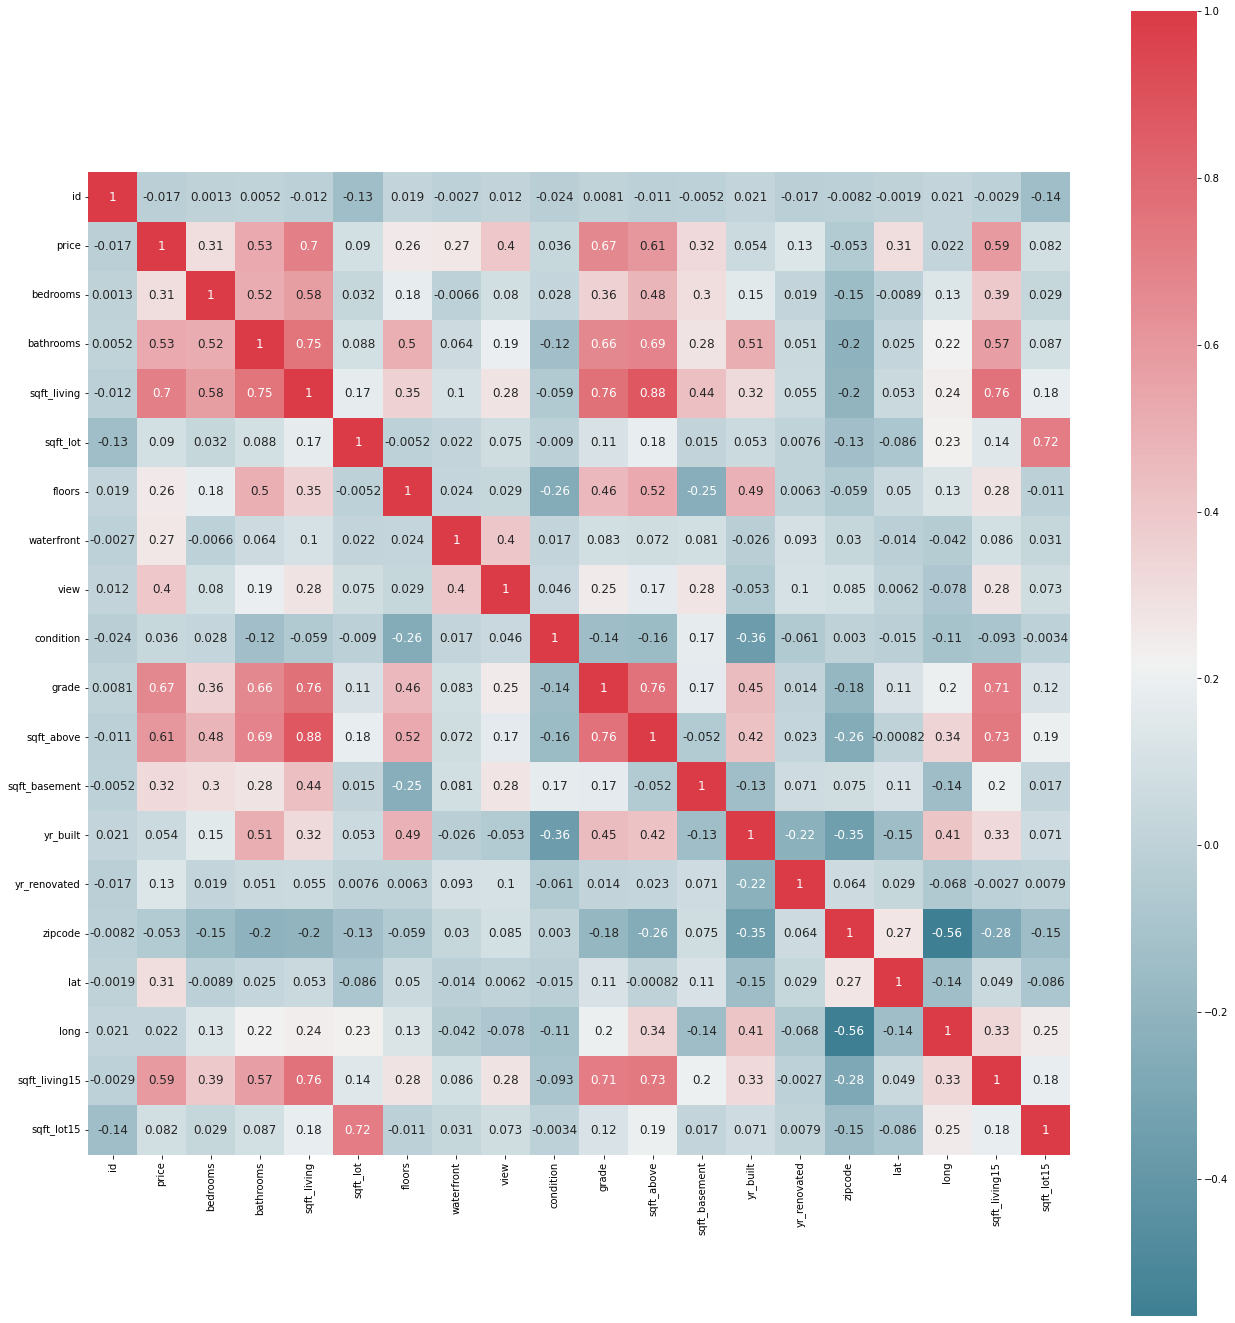

In [8]:
plot_correlation_map(data)

In [9]:
# strong correlation between price and sqft-living

In [35]:
from sklearn.model_selection import train_test_split
y = data["price"].values
x = data["sqft_living"].values[:,np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 30, test_size = .2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

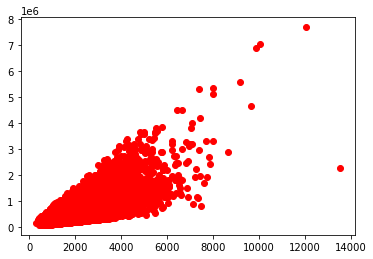

In [36]:
plt.scatter(x,y, color="r")
plt.plot(x, model.predict(x), color="k")
plt.show()

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("mse", mean_squared_error(y_test, predicted))
print("r²", metrics.r2_score(y_test, predicted))

mse 64179676631.68388
r² 0.4879814110728805


In [38]:
x = data[["sqft_living", "grade"]].values
y = data["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .35, random_state = 40)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("mse", mean_squared_error(y_test, predicted))
print("r²", metrics.r2_score(y_test, predicted))

mse 61353251624.914246
r² 0.5399473016540437


In [39]:
from sklearn.preprocessing import PolynomialFeatures
x = data[["sqft_living", "grade"]].values
y = data["price"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .35, random_state = 40)
lg = LinearRegression()
poly = PolynomialFeatures(degree=3)

In [21]:
x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("mse", mean_squared_error(y_test, predicted))
print("r²", metrics.r2_score(y_test, predicted))

mse 52491539031.28189
r² 0.6063961806081851


In [ ]:
#polynomial regression has smaller mse and greater R², best model